<a href="https://colab.research.google.com/github/Nikhil29/Hackathon/blob/master/popularCbbcFactors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# clone the git repo
!git clone https://github.com/Nikhil29/Hackathon.git
%cd Hackathon
!git pull origin master
%cd ..

fatal: destination path 'Hackathon' already exists and is not an empty directory.
/content/Hackathon
From https://github.com/Nikhil29/Hackathon
 * branch            master     -> FETCH_HEAD
Already up to date.
/content


In [0]:
# set the folder to use the ython files etc.
import sys
sys.path.append('/content/Hackathon')

In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [5]:
# Load the Red Wines dataset
path = '/content/Hackathon/data/01.xlsx';
data = pd.read_excel(path)

# Display the first five records
display(data.head(n=5))

,CBBC Code,CBBC Name,Trade Date,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,Trading Currency,Day High,Day Low,Closing Price,Volume,Turnover,Issuer,Underlying,Bull/Bear,CBBC Type,CBBC Category,Listing Date,Last Trading Date,Maturity Date,MCE,Strike/Call Currency,Strike Level,Call Level,Ent. Ratio^,Delisting Date**
0,57003,UB#HSI RC2010B,2019-01-31,380000,0.265,-80000,-0.275,2290000,1.15,200000000,HKD,0.265,0.265,0.270,460000,122700,UB,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,24038.0,24138.0,12000,-
1,57014,UB#TENCTRC1903U,2019-01-31,0,0.000,0,0.000,10000,0.03,40000000,HKD,0.000,0.000,0.920,0,0,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100,2019-03-15 00:00:00
2,57015,JP#TENCTRC1902A,2019-01-31,0,0.000,0,0.000,1000,0.00,50000000,HKD,0.000,0.000,0.960,0,0,JP,700,Bull,Standard,R,2018-11-06,2019-02-14 00:00:00,2019-02-15,N,HKD,252.4,255.2,100,2019-02-18 00:00:00
3,57016,JP#HSI RC2009V,2019-01-31,150000,0.290,0,0.000,100000,0.05,200000000,HKD,0.295,0.280,0.295,150000,43500,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-09-29,N,-,24458.0,24558.0,10000,-
4,57017,JP#HSI RC2010E,2019-01-31,0,0.000,0,0.000,3290000,1.65,200000000,HKD,0.000,0.000,0.390,0,0,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,23358.0,23458.0,10000,-


In [9]:
# transform data

# add net sales column
data['Net Sales'] = data.apply(lambda row: (row['No. of CBBC Bought *'] + row['No. of CBBC Sold *']) * row['Closing Price'], axis = 1)

#add the days left from the maturity date and the days past the listing date columns
data['Days past listing date'] = (data['Trade Date'] - data['Listing Date']).dt.days
data['Days fom maturity date'] = (data['Maturity Date'] - data['Trade Date']).dt.days
data['Maturity Days from Issuance'] = (data['Maturity Date'] - data['Listing Date']).dt.days

#set the index as date
data.index = data['Trade Date']

# Display the first five records
display(data.head(n=5))

,CBBC Code,CBBC Name,Trade Date,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,Trading Currency,Day High,Day Low,Closing Price,Volume,Turnover,Issuer,Underlying,Bull/Bear,CBBC Type,CBBC Category,Listing Date,Last Trading Date,Maturity Date,MCE,Strike/Call Currency,Strike Level,Call Level,Ent. Ratio^,Delisting Date**,Net Sales,Days past listing date,Days fom maturity date,Maturity Days from Issuance
Trade Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-31,57003,UB#HSI RC2010B,2019-01-31,380000,0.265,-80000,-0.275,2290000,1.15,200000000,HKD,0.265,0.265,0.270,460000,122700,UB,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,24038.0,24138.0,12000,-,81000.0,86,637,723
2019-01-31,57014,UB#TENCTRC1903U,2019-01-31,0,0.000,0,0.000,10000,0.03,40000000,HKD,0.000,0.000,0.920,0,0,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100,2019-03-15 00:00:00,0.0,86,42,128
2019-01-31,57015,JP#TENCTRC1902A,2019-01-31,0,0.000,0,0.000,1000,0.00,50000000,HKD,0.000,0.000,0.960,0,0,JP,700,Bull,Standard,R,2018-11-06,2019-02-14 00:00:00,2019-02-15,N,HKD,252.4,255.2,100,2019-02-18 00:00:00,0.0,86,15,101
2019-01-31,57016,JP#HSI RC2009V,2019-01-31,150000,0.290,0,0.000,100000,0.05,200000000,HKD,0.295,0.280,0.295,150000,43500,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-09-29,N,-,24458.0,24558.0,10000,-,44250.0,86,607,693
2019-01-31,57017,JP#HSI RC2010E,2019-01-31,0,0.000,0,0.000,3290000,1.65,200000000,HKD,0.000,0.000,0.390,0,0,JP,HSI,Bull,Standard,R,2018-11-06,-,2020-10-29,N,-,23358.0,23458.0,10000,-,0.0,86,637,723


,CBBC Code,CBBC Name,Trade Date,No. of CBBC Bought *,Average Price per CBBC Bought *,No. of CBBC Sold *,Average Price per CBBC Sold *,No. of CBBC still out in market *,% of issue still out in market *,Total Issue Size *,Trading Currency,Day High,Day Low,Closing Price,Volume,Turnover,Issuer,Underlying,Bull/Bear,CBBC Type,CBBC Category,Listing Date,Last Trading Date,Maturity Date,MCE,Strike/Call Currency,Strike Level,Call Level,Ent. Ratio^,Delisting Date**,Net Sales,Days past listing date,Days fom maturity date,Maturity Days from Issuance
Trade Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-31,57014,UB#TENCTRC1903U,2019-01-31,0,0.00,0,0.0,10000,0.03,40000000,HKD,0.0,0.0,0.92,0,0,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100,2019-03-15 00:00:00,0.0,86,42,128
2019-01-30,57014,UB#TENCTRC1903U,2019-01-30,0,0.00,0,0.0,10000,0.03,40000000,HKD,0.0,0.0,0.88,0,0,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100,2019-03-15 00:00:00,0.0,85,43,128
2019-01-29,57014,UB#TENCTRC1903U,2019-01-29,0,0.00,0,0.0,10000,0.03,40000000,HKD,0.0,0.0,0.88,0,0,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100,2019-03-15 00:00:00,0.0,84,44,128
2019-01-28,57014,UB#TENCTRC1903U,2019-01-28,0,0.00,0,0.0,10000,0.03,40000000,HKD,0.0,0.0,0.88,0,0,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100,2019-03-15 00:00:00,0.0,83,45,128
2019-01-25,57014,UB#TENCTRC1903U,2019-01-25,20000,0.86,0,0.0,10000,0.03,40000000,HKD,0.0,0.0,0.88,20000,17200,UB,700,Bull,Standard,R,2018-11-06,2019-03-13 00:00:00,2019-03-14,N,HKD,255.4,257.9,100,2019-03-15 00:00:00,17600.0,80,48,128


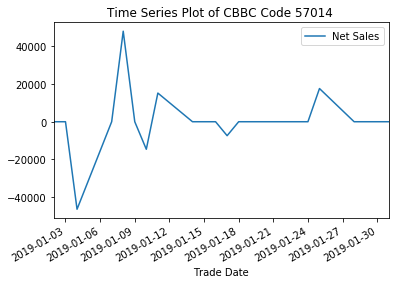

In [36]:
# time series for a single product
cbbcCode = 57014

productData = data[(data['CBBC Code'] == cbbcCode)]

productData[['Net Sales']].plot()
plt.title("Time Series Plot of CBBC Code {} ".format(cbbcCode));

display(productData.head())

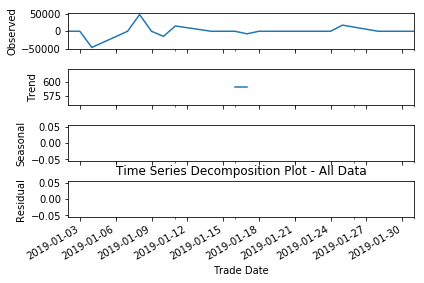

In [37]:
# Time Series Decomposition
series = productData['Net Sales']
result = seasonal_decompose(series, model='additive', freq=21)
result.plot();
plt.title("Time Series Decomposition Plot - All Data");

In [0]:
# Mean Sale of Various Products
data[data.store == cbbcCode].groupby(['item']).mean()[['sales']].plot.bar(figsize=(13, 7));
plt.title("Mean Sales of Items within Store {}".format(the_store));